In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import os
import json
from pathlib import Path

In [14]:
def func(object_name):
    if "." in object_name:
        return False
    else:
        return True

In [18]:
folder_path = "./jsons/baseline/simple_3/"
algos = filter(func, sorted(os.listdir(folder_path)))
algos = list(algos)

### Global Accuracy

In [19]:
data = {algo: [] for algo in algos}
for algo in algos:
    global_cfmtx = json.load(open(os.path.join(folder_path, algo, "global_cfmtx_record.json"), "r"))
    for r in range(len(global_cfmtx)):
        data[algo].append(np.mean(np.diag(global_cfmtx[r])))

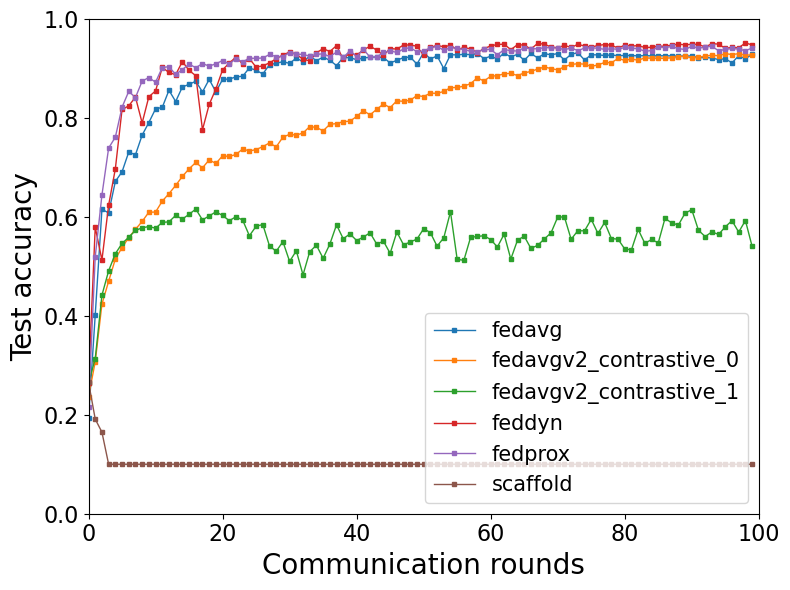

In [20]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(8,6))
plt.xlabel("Communication rounds", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)

for algo in data.keys():
    plt.plot(data[algo], label=algo,
            linestyle='solid', marker='s',
            linewidth=1, markersize=3)
    
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend(loc="lower right", fontsize=15, ncol=1)
plt.tight_layout()
plt.savefig(folder_path + "Global_Accuracy.png")

### Local Accuracy

In [ ]:
data = {algo: [] for algo in algos}
for algo in algos:
    local_cfmtx = json.load(open(os.path.join(folder_path, algo, "local_cfmtx_record.json"), "r"))
    for r in range(len(local_cfmtx)):
        clients_acc = []
        for client_id in local_cfmtx:
            clients_acc.append(np.mean(np.diag(local_cfmtx[client_id][r])))

        data[algo].append(np.mean(clients_acc))

### Contrastive infor analysis

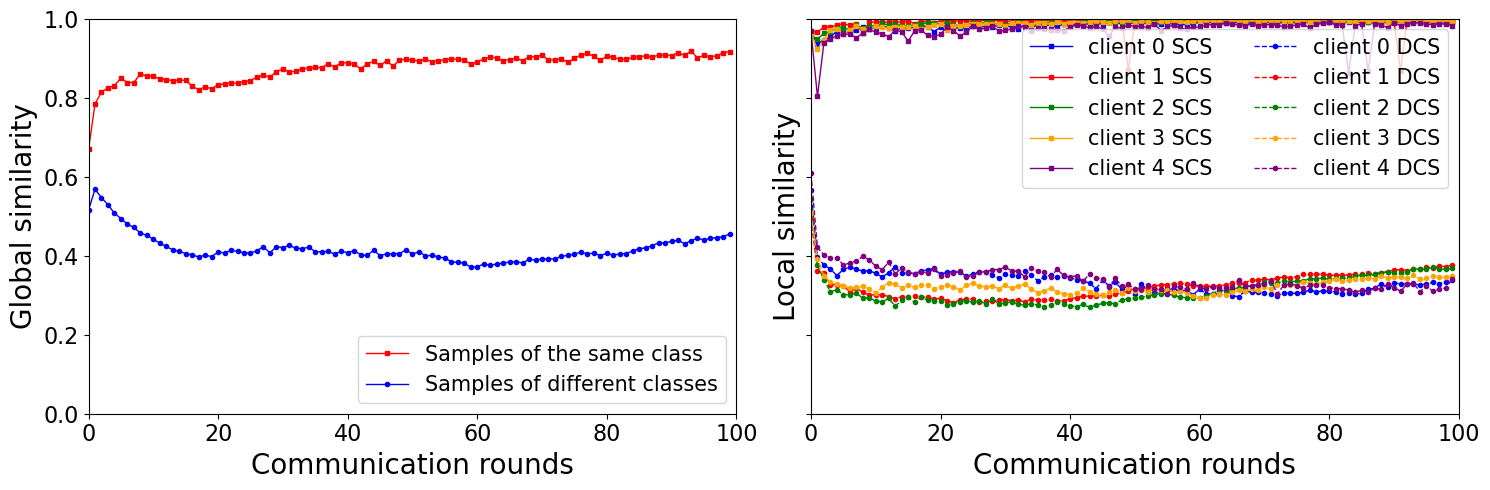

In [7]:
folder_path = "./jsons/baseline/simple_3/fedavgv2_contrastive_0"

global_data = json.load(open(f"{folder_path}/global_constrastive_info.json", "r"))
local_data = json.load(open(f"{folder_path}/local_constrastive_info.json", "r"))

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)

axes[0].set_xlabel("Communication rounds", fontsize=20)
axes[0].set_ylabel("Global similarity", fontsize=20)

axes[0].plot(global_data["same"], label="Samples of the same class", linestyle='solid', marker='s', linewidth=1, markersize=3, color="red")
axes[0].plot(global_data["diff"], label="Samples of different classes", linestyle='solid', marker='o', linewidth=1, markersize=3, color="blue")

axes[0].set_xlim(0,100)
axes[0].set_ylim(0,1)
axes[0].legend(loc="lower right", fontsize=15, ncol=1)

cols = ["blue", "red", "green", "orange", "purple"]
axes[1].set_xlabel("Communication rounds", fontsize=20)
axes[1].set_ylabel("Local similarity", fontsize=20)

for i in range(5):
    axes[1].plot(local_data[str(i)]["same"], label=f"client {i} SCS", linestyle='solid', marker='s', linewidth=1, markersize=3, color=cols[i])

for i in range(5):
    axes[1].plot(local_data[str(i)]["diff"], label=f"client {i} DCS", linestyle='dashed', marker='o', linewidth=1, markersize=3, color=cols[i])

axes[1].set_xlim(0,100)
axes[1].set_ylim(0,1)
axes[1].legend(loc="best", fontsize=15, ncol=2)

plt.tight_layout()
plt.savefig(folder_path + "/Contrastive_infor.png")
# plt.show()